In [23]:
# importing all necessary libraries
import pickle

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import (LinearRegression, Lasso, Ridge)

from sklearn.metrics import mean_squared_error 

In [27]:
# reading the parquet file with the data
data = pd.read_parquet('../data/january_2021')

In [29]:
#saving the data in csv
data.to_csv('green_tripdata.csv')

In [31]:
# importing the data
df = pd.read_csv('green_tripdata.csv')

C:\Users\PC\AppData\Local\Temp\ipykernel_20072\3769022231.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('green_tripdata.csv')


In [32]:
# the data
df.head()

,Unnamed: 0,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,...,0.5,0.5,0.00,0.0,NaN,0.3,6.80,2.0,1.0,0.00
1,1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,...,0.5,0.5,2.81,0.0,NaN,0.3,16.86,1.0,1.0,2.75
2,2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,...,0.5,0.5,1.00,0.0,NaN,0.3,8.30,1.0,1.0,0.00
3,3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,...,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2.0,1.0,0.00
4,4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,...,0.0,-0.5,0.00,0.0,NaN,-0.3,-52.80,3.0,1.0,0.00


In [33]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             76518 non-null  int64  
 1   VendorID               76518 non-null  int64  
 2   lpep_pickup_datetime   76518 non-null  object 
 3   lpep_dropoff_datetime  76518 non-null  object 
 4   store_and_fwd_flag     40471 non-null  object 
 5   RatecodeID             40471 non-null  float64
 6   PULocationID           76518 non-null  int64  
 7   DOLocationID           76518 non-null  int64  
 8   passenger_count        40471 non-null  float64
 9   trip_distance          76518 non-null  float64
 10  fare_amount            76518 non-null  float64
 11  extra                  76518 non-null  float64
 12  mta_tax                76518 non-null  float64
 13  tip_amount             76518 non-null  float64
 14  tolls_amount           76518 non-null  float64
 15  eh

In [34]:
# create a column for duration
df["duration"] = pd.to_datetime(df["lpep_dropoff_datetime"]) - pd.to_datetime(df["lpep_pickup_datetime"])
df.head()

,Unnamed: 0,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,...,0.5,0.00,0.0,NaN,0.3,6.80,2.0,1.0,0.00,0 days 00:03:56
1,1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,...,0.5,2.81,0.0,NaN,0.3,16.86,1.0,1.0,2.75,0 days 00:08:45
2,2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,...,0.5,1.00,0.0,NaN,0.3,8.30,1.0,1.0,0.00,0 days 00:05:58
3,3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,...,0.5,0.00,0.0,NaN,0.3,9.30,2.0,1.0,0.00,0 days 00:07:05
4,4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,...,-0.5,0.00,0.0,NaN,-0.3,-52.80,3.0,1.0,0.00,0 days 00:00:04


In [36]:
#convert the duration column to minutes
df.duration = df.duration.apply(lambda x: x.total_seconds() / 60)

In [37]:
df

,Unnamed: 0,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,0.000000,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,...,0.5,0.00,0.00,NaN,0.3,6.80,2.0,1.0,0.00,3.933333
1,0.000278,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,...,0.5,2.81,0.00,NaN,0.3,16.86,1.0,1.0,2.75,8.750000
2,0.000556,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,...,0.5,1.00,0.00,NaN,0.3,8.30,1.0,1.0,0.00,5.966667
3,0.000833,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,...,0.5,0.00,0.00,NaN,0.3,9.30,2.0,1.0,0.00,7.083333
4,0.001111,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,...,-0.5,0.00,0.00,NaN,-0.3,-52.80,3.0,1.0,0.00,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,21.253611,2,2021-01-31 21:38:00,2021-01-31 22:16:00,NaN,NaN,81,90,NaN,17.63,...,0.0,0.00,6.12,NaN,0.3,65.40,NaN,NaN,NaN,38.000000
76514,21.253889,2,2021-01-31 22:43:00,2021-01-31 23:21:00,NaN,NaN,35,213,NaN,18.36,...,0.0,12.20,6.12,NaN,0.3,65.28,NaN,NaN,NaN,38.000000
76515,21.254167,2,2021-01-31 22:16:00,2021-01-31 22:27:00,NaN,NaN,74,69,NaN,2.50,...,0.0,0.00,0.00,NaN,0.3,22.00,NaN,NaN,NaN,11.000000
76516,21.254444,2,2021-01-31 23:10:00,2021-01-31 23:37:00,NaN,NaN,168,215,NaN,14.48,...,0.0,0.00,6.12,NaN,0.3,58.04,NaN,NaN,NaN,27.000000


In [38]:
#get categorical and numerical variable

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

categorical

['PULocationID', 'DOLocationID']

In [41]:
df[categorical].head()

,PULocationID,DOLocationID
0,43,151
1,166,239
2,41,42
3,168,75
4,265,265


In [42]:
#convert categorical variable to str

df[categorical] = df[categorical].astype(str)

In [43]:
#reduce dataset to only duration between 1 and 60

df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]

df.head()

,Unnamed: 0,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,0.000000,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,...,0.5,0.00,0.0,NaN,0.3,6.80,2.0,1.0,0.00,3.933333
1,0.000278,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,...,0.5,2.81,0.0,NaN,0.3,16.86,1.0,1.0,2.75,8.750000
2,0.000556,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,...,0.5,1.00,0.0,NaN,0.3,8.30,1.0,1.0,0.00,5.966667
3,0.000833,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,...,0.5,0.00,0.0,NaN,0.3,9.30,2.0,1.0,0.00,7.083333
7,0.001944,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,...,0.5,0.96,0.0,NaN,0.3,5.76,1.0,1.0,0.00,2.316667


In [44]:
# get only trip_type = 2 (Dispatch)

df = df[df['trip_type'] == 1]
df

,Unnamed: 0,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,0.000000,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,...,0.5,0.00,0.0,NaN,0.3,6.80,2.0,1.0,0.00,3.933333
1,0.000278,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,...,0.5,2.81,0.0,NaN,0.3,16.86,1.0,1.0,2.75,8.750000
2,0.000556,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,...,0.5,1.00,0.0,NaN,0.3,8.30,1.0,1.0,0.00,5.966667
3,0.000833,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,...,0.5,0.00,0.0,NaN,0.3,9.30,2.0,1.0,0.00,7.083333
7,0.001944,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,...,0.5,0.96,0.0,NaN,0.3,5.76,1.0,1.0,0.00,2.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40466,11.240556,2,2021-01-31 23:34:34,2021-01-31 23:42:59,N,1.0,168,47,1.0,1.39,...,0.5,0.00,0.0,NaN,0.3,8.30,1.0,1.0,0.00,8.416667
40467,11.240833,1,2021-01-31 23:13:36,2021-01-31 23:17:51,N,1.0,75,238,1.0,1.20,...,0.5,0.00,0.0,NaN,0.3,6.80,2.0,1.0,0.00,4.250000
40468,11.241111,2,2021-01-31 23:46:45,2021-01-31 23:57:08,N,1.0,41,263,1.0,2.70,...,0.5,0.00,0.0,NaN,0.3,14.55,1.0,1.0,2.75,10.383333
40469,11.241389,1,2021-01-31 23:42:17,2021-01-31 23:48:19,N,1.0,75,75,1.0,1.10,...,0.5,1.80,0.0,NaN,0.3,9.10,1.0,1.0,0.00,6.033333


C:\Users\PC\AppData\Local\Temp\ipykernel_20072\3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='duration', ylabel='Density'>

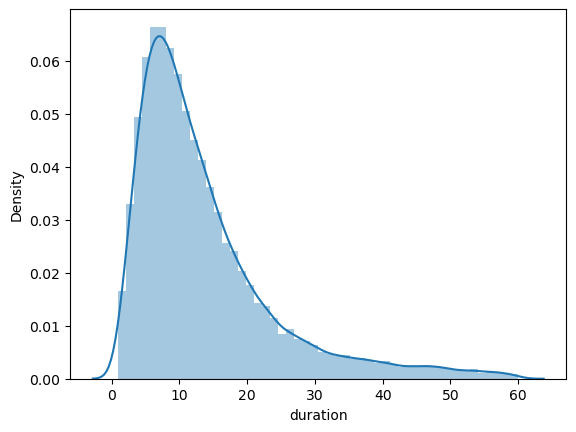

In [45]:
sns.distplot(df.duration)

In [46]:
# describe the distribution of duration
df.duration.describe()

count    37535.000000
mean        13.666291
std         10.379737
min          1.000000
25%          6.650000
50%         10.700000
75%         17.166667
max         59.983333
Name: duration, dtype: float64

In [47]:
# convert the numerical and categorical data to list of dictionary

train_dicts = df[categorical + numerical].to_dict(orient='records')

In [48]:
# One-Hot Encoding

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
X_train

<37535x464 sparse matrix of type '<class 'numpy.float64'>'
	with 112605 stored elements in Compressed Sparse Row format>

In [52]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',
 'DOLocationID=146',

In [51]:
# defining the target variable for training

target = 'duration'
y_train = df[target].values
y_train

array([ 3.93333333,  8.75      ,  5.96666667, ..., 10.38333333,
        6.03333333, 19.9       ])

In [53]:
# Training Model

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = lr.predict(X_train)

C:\Users\PC\AppData\Local\Temp\ipykernel_20072\1989967080.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

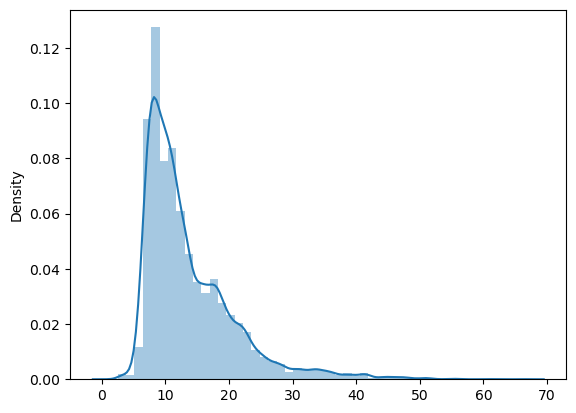

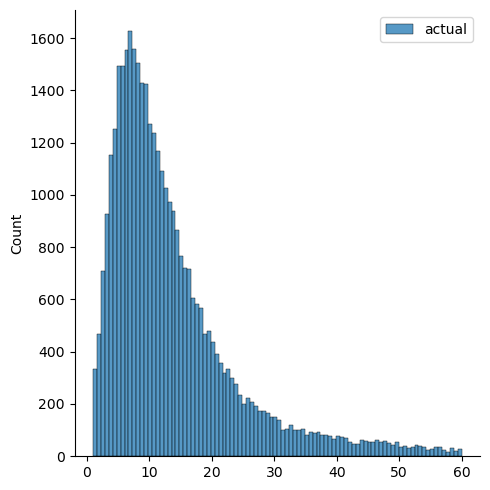

In [55]:
sns.distplot(y_pred, label='prediction')
sns.displot(y_train, label='actual')

plt.legend()

In [56]:
# estimating the peformance of the training model

mean_squared_error(y_train, y_pred, squared=False)

7.5288589123081895

In [68]:
# data preprocessing

def data_prep(file_path):
    # import the parquet file
    data = pd.read_parquet(file_path)

    # input file name
    file_name = input('Enter File Name:' )

    # save file in the active directory in csv
    data.to_csv(file_name + '.csv')

    #import csv file
    df = pd.read_csv(file_name + '.csv')

    # create a column for duration
    df["duration"] = pd.to_datetime(df["lpep_dropoff_datetime"]) - pd.to_datetime(df["lpep_pickup_datetime"])

    #convert the duration column to minutes
    df.duration = df.duration.apply(lambda x: x.total_seconds() / 60)

    #get categorical variable
    categorical = ['PULocationID', 'DOLocationID']

    #convert categorical variable to str
    df[categorical] = df[categorical].astype(str)

    #reduce dataset to only duration between 1 and 60
    df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]

    return df
    

In [69]:
# Get validation dataset

df_val = data_prep('../data/february_2022.file')
df_val

Enter File Name: green_tripdata


,Unnamed: 0,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,0,2,2021-02-01 00:34:03,2021-02-01 00:51:58,N,1.0,130,205,5.0,3.66,...,0.5,10.00,0.0,NaN,0.3,25.30,1.0,1.0,0.00,17.916667
1,1,2,2021-02-01 00:04:00,2021-02-01 00:10:30,N,1.0,152,244,1.0,1.10,...,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.00,6.500000
2,2,2,2021-02-01 00:18:51,2021-02-01 00:34:06,N,1.0,152,48,1.0,4.93,...,0.5,0.00,0.0,NaN,0.3,20.55,2.0,1.0,2.75,15.250000
3,3,2,2021-02-01 00:53:27,2021-02-01 01:11:41,N,1.0,152,241,1.0,6.70,...,0.5,0.00,0.0,NaN,0.3,22.30,2.0,1.0,0.00,18.233333
4,4,2,2021-02-01 00:57:46,2021-02-01 01:06:44,N,1.0,75,42,1.0,1.89,...,0.5,2.45,0.0,NaN,0.3,12.25,1.0,1.0,0.00,8.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64567,64567,2,2021-02-28 22:19:00,2021-02-28 22:29:00,NaN,NaN,129,7,NaN,2.63,...,0.0,0.00,0.0,NaN,0.3,10.34,NaN,NaN,NaN,10.000000
64568,64568,2,2021-02-28 23:18:00,2021-02-28 23:27:00,NaN,NaN,116,166,NaN,1.87,...,0.0,1.89,0.0,NaN,0.3,10.52,NaN,NaN,NaN,9.000000
64569,64569,2,2021-02-28 23:44:00,2021-02-28 23:58:00,NaN,NaN,74,151,NaN,2.40,...,0.0,0.00,0.0,NaN,0.3,12.91,NaN,NaN,NaN,14.000000
64570,64570,2,2021-02-28 23:07:00,2021-02-28 23:14:00,NaN,NaN,42,42,NaN,1.11,...,0.0,0.00,0.0,NaN,0.3,15.00,NaN,NaN,NaN,7.000000


In [79]:
df_train = data_prep('../data/january_2021')
df_train

Enter File Name: green_tripdata_january


C:\Users\PC\AppData\Local\Temp\ipykernel_20072\1631563823.py:14: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name + '.csv')


,Unnamed: 0,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
0,0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,...,0.5,0.00,0.00,NaN,0.3,6.80,2.0,1.0,0.00,3.933333
1,1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,...,0.5,2.81,0.00,NaN,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,...,0.5,1.00,0.00,NaN,0.3,8.30,1.0,1.0,0.00,5.966667
3,3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,...,0.5,0.00,0.00,NaN,0.3,9.30,2.0,1.0,0.00,7.083333
7,7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,...,0.5,0.96,0.00,NaN,0.3,5.76,1.0,1.0,0.00,2.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,NaN,NaN,81,90,NaN,17.63,...,0.0,0.00,6.12,NaN,0.3,65.40,NaN,NaN,NaN,38.000000
76514,76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,NaN,NaN,35,213,NaN,18.36,...,0.0,12.20,6.12,NaN,0.3,65.28,NaN,NaN,NaN,38.000000
76515,76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,NaN,NaN,74,69,NaN,2.50,...,0.0,0.00,0.00,NaN,0.3,22.00,NaN,NaN,NaN,11.000000
76516,76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,NaN,NaN,168,215,NaN,14.48,...,0.0,0.00,6.12,NaN,0.3,58.04,NaN,NaN,NaN,27.000000


In [89]:
df_train = pd.read_csv('green_tripdata_january.csv')
df_val = pd.read_csv('green_tripdata.csv')

C:\Users\PC\AppData\Local\Temp\ipykernel_20072\3666012698.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('green_tripdata_january.csv')


In [90]:
# Training on validation dataset

print(len(df_train), len(df_val))

76518 64572


In [103]:
df_train = df_train.astype({'PULocationID':'str'})
df_train = df_train.astype({'DOLocationID':'str'})

df_val = df_val.astype({'PULocationID':'str'})
df_val = df_val.astype({'DOLocationID':'str'})

df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64572 entries, 0 to 64571
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             64572 non-null  int64  
 1   VendorID               64572 non-null  int64  
 2   lpep_pickup_datetime   64572 non-null  object 
 3   lpep_dropoff_datetime  64572 non-null  object 
 4   store_and_fwd_flag     35463 non-null  object 
 5   RatecodeID             35463 non-null  float64
 6   PULocationID           64572 non-null  object 
 7   DOLocationID           64572 non-null  object 
 8   passenger_count        35463 non-null  float64
 9   trip_distance          64572 non-null  float64
 10  fare_amount            64572 non-null  float64
 11  extra                  64572 non-null  float64
 12  mta_tax                64572 non-null  float64
 13  tip_amount             64572 non-null  float64
 14  tolls_amount           64572 non-null  float64
 15  eh

In [105]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [110]:
# data preprocessing

def data_cleansing(df):

    # create a column for duration
    df["duration"] = pd.to_datetime(df["lpep_dropoff_datetime"]) - pd.to_datetime(df["lpep_pickup_datetime"])

    #convert the duration column to minutes
    df.duration = df.duration.apply(lambda x: x.total_seconds() / 60)

    #reduce dataset to only duration between 1 and 60
    df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]

    return df

In [111]:
data_cleansing(df_train)
data_cleansing(df_val)

,Unnamed: 0,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,PU_DO,duration
0,0,2,2021-02-01 00:34:03,2021-02-01 00:51:58,N,1.0,130,205,5.0,3.66,...,10.00,0.0,NaN,0.3,25.30,1.0,1.0,0.00,130_205,17.916667
1,1,2,2021-02-01 00:04:00,2021-02-01 00:10:30,N,1.0,152,244,1.0,1.10,...,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.00,152_244,6.500000
2,2,2,2021-02-01 00:18:51,2021-02-01 00:34:06,N,1.0,152,48,1.0,4.93,...,0.00,0.0,NaN,0.3,20.55,2.0,1.0,2.75,152_48,15.250000
3,3,2,2021-02-01 00:53:27,2021-02-01 01:11:41,N,1.0,152,241,1.0,6.70,...,0.00,0.0,NaN,0.3,22.30,2.0,1.0,0.00,152_241,18.233333
4,4,2,2021-02-01 00:57:46,2021-02-01 01:06:44,N,1.0,75,42,1.0,1.89,...,2.45,0.0,NaN,0.3,12.25,1.0,1.0,0.00,75_42,8.966667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64567,64567,2,2021-02-28 22:19:00,2021-02-28 22:29:00,NaN,NaN,129,7,NaN,2.63,...,0.00,0.0,NaN,0.3,10.34,NaN,NaN,NaN,129_7,10.000000
64568,64568,2,2021-02-28 23:18:00,2021-02-28 23:27:00,NaN,NaN,116,166,NaN,1.87,...,1.89,0.0,NaN,0.3,10.52,NaN,NaN,NaN,116_166,9.000000
64569,64569,2,2021-02-28 23:44:00,2021-02-28 23:58:00,NaN,NaN,74,151,NaN,2.40,...,0.00,0.0,NaN,0.3,12.91,NaN,NaN,NaN,74_151,14.000000
64570,64570,2,2021-02-28 23:07:00,2021-02-28 23:14:00,NaN,NaN,42,42,NaN,1.11,...,0.00,0.0,NaN,0.3,15.00,NaN,NaN,NaN,42_42,7.000000


In [84]:
# training pipeline

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

# converting dataset to a list of dict
dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
    
# defining the target variable for training
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values


In [85]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

ValueError: Found input variables with inconsistent numbers of samples: [61921, 73908]

In [87]:
# Using Lasso

lr = Lasso(alpha=0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

ValueError: Found input variables with inconsistent numbers of samples: [61921, 73908]

In [88]:
# Using Lasso

lr = Ridge()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

ValueError: Found input variables with inconsistent numbers of samples: [61921, 73908]

In [112]:
#using another approach

# training pipeline

categorical = ['PU_DO']
numerical = ['trip_distance']

# converting dataset to a list of dict
dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)
    
# defining the target variable for training
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values


In [113]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

ValueError: Found input variables with inconsistent numbers of samples: [64572, 76518]

In [114]:
#save model

with open('models/lin_reg.bin', 'wb') as f_out:
    pickle(dump(dv, lr), f_out)

FileNotFoundError: [Errno 2] No such file or directory: 'models/lin_reg.bin'